<a href="https://colab.research.google.com/github/pradyunpr7/SparkProjects/blob/main/Task2_Optimal_numbers_of_Clusters(Unsupervised_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2:Finding the Optimal Number of Clusters(Unsupervised Learning)**


**Aim:**Finding the centroids and optimal number of clusters

**By:**B.Pradyun Reddy

Model Used: K-Means Clustering


> First Let's import the essential models for our project.






In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as se
se.set()
%matplotlib inline




*   Let's Import our Dataset 
*   Convert it into Csv



In [14]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (3).csv


In [15]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
df
# Dataset is now stored in a Pandas Dataframe as shown below

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Let's Ensure that there are no null values.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.drop('Id' , axis=1 , inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Correlation Helps Us Get a Better understanding of relation among various attributes

In [18]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Next we create a visualization inorder to understand the correlation between the attributes.

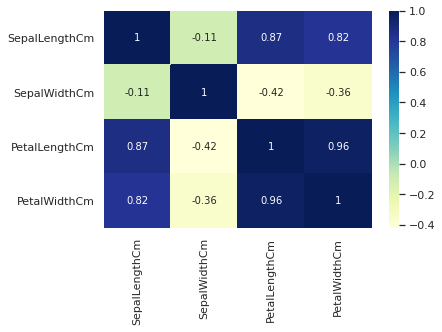

In [ ]:
r= se.heatmap(df.corr(), cmap="YlGnBu", annot=True)#visualization of the relation between predictors

lets store our attribute values into a dataset.

In [19]:
xc = df.iloc[:,[0,1,2,3]].values
print(xc)

[[  1.    5.1   3.5   1.4]
 [  2.    4.9   3.    1.4]
 [  3.    4.7   3.2   1.3]
 [  4.    4.6   3.1   1.5]
 [  5.    5.    3.6   1.4]
 [  6.    5.4   3.9   1.7]
 [  7.    4.6   3.4   1.4]
 [  8.    5.    3.4   1.5]
 [  9.    4.4   2.9   1.4]
 [ 10.    4.9   3.1   1.5]
 [ 11.    5.4   3.7   1.5]
 [ 12.    4.8   3.4   1.6]
 [ 13.    4.8   3.    1.4]
 [ 14.    4.3   3.    1.1]
 [ 15.    5.8   4.    1.2]
 [ 16.    5.7   4.4   1.5]
 [ 17.    5.4   3.9   1.3]
 [ 18.    5.1   3.5   1.4]
 [ 19.    5.7   3.8   1.7]
 [ 20.    5.1   3.8   1.5]
 [ 21.    5.4   3.4   1.7]
 [ 22.    5.1   3.7   1.5]
 [ 23.    4.6   3.6   1. ]
 [ 24.    5.1   3.3   1.7]
 [ 25.    4.8   3.4   1.9]
 [ 26.    5.    3.    1.6]
 [ 27.    5.    3.4   1.6]
 [ 28.    5.2   3.5   1.5]
 [ 29.    5.2   3.4   1.4]
 [ 30.    4.7   3.2   1.6]
 [ 31.    4.8   3.1   1.6]
 [ 32.    5.4   3.4   1.5]
 [ 33.    5.2   4.1   1.5]
 [ 34.    5.5   4.2   1.4]
 [ 35.    4.9   3.1   1.5]
 [ 36.    5.    3.2   1.2]
 [ 37.    5.5   3.5   1.3]
 

Lets import the our Kmeans method from the sklearn module.
For the instance let's  take 6 clusters and fit our values.

In [20]:
from sklearn.cluster import KMeans
s = []

for i in range(1,6):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=6, random_state=0)
  kmeans.fit(xc)
  s.append(kmeans.inertia_)
s  

[281831.54466666665,
 70581.3808,
 31320.711199999998,
 17799.262549239524,
 11432.51325101965]

Plotting an elbow curve helps us find the ideal number of clusters.

<function matplotlib.pyplot.show>

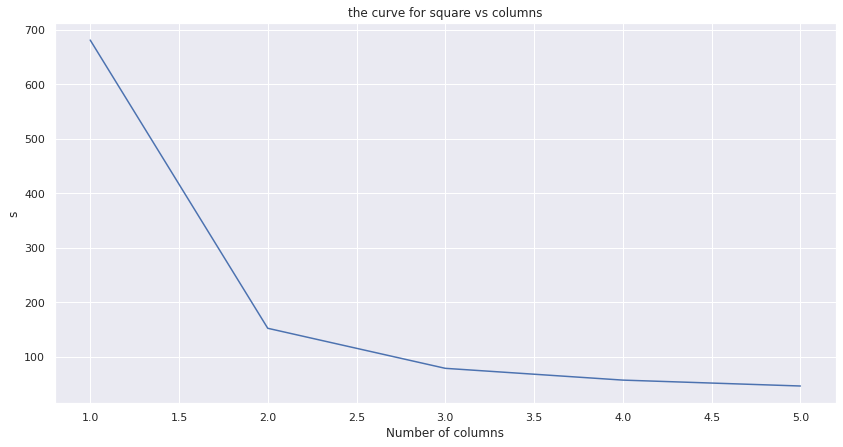

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(range(1,6),s)
plt.title('the curve for square vs columns')
plt.xlabel('Number of columns')
plt.ylabel('s')
plt.show



As there is a steep decrease after the 3rd cluster we choose 3 as optimal number of clusters and now let's begin predicting the values.

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300, n_init=10, random_state=0)
y = kmeans.fit_predict(xc)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


let' Firstly plot a relation for sepal length and sepal width.

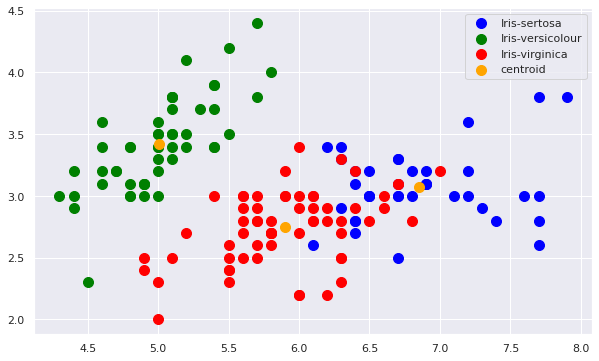

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(xc[y == 0, 0], xc[y == 0,1], s = 100, c = 'blue', label = 'Iris-sertosa')
plt.scatter(xc[y == 1, 0], xc[y == 1,1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(xc[y == 2, 0], xc[y == 2,1], s = 100, c = 'red', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'orange', label ='centroid')

plt.legend()
plt.show()


